#PUNTO 1




In [1]:
dictTable1 = {}
dictTable1['db'] = 'dentistas.db'
dictTable1 ['name'] = 'dentistas'
dictTable1 ['keys'] = 'id,nombre,edad,especialidad'

In [3]:
dictTable2 = {}
dictTable2['db'] = 'dentistas.db'
dictTable2 ['name'] = 'pacientes'
dictTable2 ['keys'] = 'id,nombre,enfermedad'

In [4]:
import sqlite3
conexion=sqlite3.connect(dictTable1['db'])
try:
    conexion.execute(f"""create table {dictTable1['name']} (
                              id integer primary key ,
                              nombre text,
                              edad,
                              especialidad text
                        )""")
    print(f"se creo la tabla {dictTable1['name']}")                        
except sqlite3.OperationalError:
    print(f"La tabla {dictTable1['name']} ya existe")                    


try:
    conexion.execute(f"""create table {dictTable2['name']} (
                              id integer primary key ,
                              nombre text,
                              enfermedad text
                        )""")
    print(f"se creo la tabla {dictTable2['name']}")                        
except sqlite3.OperationalError:
    print(f"La tabla {dictTable2['name']} ya existe")                    
conexion.close()

se creo la tabla dentistas
se creo la tabla pacientes


In [14]:
import sqlite3

conexion=sqlite3.connect(dictTable1['db'])
conexion.execute (f'insert into {dictTable1["name"]}({dictTable1["keys"]}) values (?,?,?,?)',
                  (1000254886,'Celia',29,'Implantología'))
conexion.commit()
conexion.close()

import sqlite3

conexion=sqlite3.connect(dictTable2['db'])
conexion.execute (f'insert into {dictTable2["name"]}({dictTable2["keys"]}) values (?,?,?)',
                  (8542168755,'Roberto','Edentulismo'))
conexion.commit()
conexion.close()

In [6]:
import sqlite3 as gestor

def showTable (dictIn):
  
  conexion = gestor.connect(dictIn['db'])
  tabla = conexion.execute(f'select {dictIn["keys"]} from {dictIn["name"]}')
  for renglon in tabla :
    print(renglon)
  conexion.close()

In [15]:
showTable(dictTable1)
showTable(dictTable2)

(272558694, 'Pablo', 25, 'Rehabilitación oral')
(1000254886, 'Celia', 29, 'Implantología')
(1192564854, 'Luis', 31, 'Endodoncia')
(1203625845, 'Diana', 27, 'Odontopediatría')
(6854958427, 'John', 35, 'Ortodoncia')
(986589475, 'Lina', 'Caries')
(987755875, 'Julia', 'Maloclusión dental')
(1004698574, 'Samuel', 'gingivitis')
(1004854751, 'Lucas', 'Periodontitis')
(8542168755, 'Roberto', 'Edentulismo')


#PUNTO 2


In [16]:
import requests
response = requests.get('https://jsonplaceholder.typicode.com/todos/4')

In [17]:
data = response.json()
print(data)

{'userId': 1, 'id': 4, 'title': 'et porro tempora', 'completed': True}


In [20]:
class Album():
  def __init__ (self,albUserId, albId, albTitle, albCompleted):
    self.userId = albUserId
    self.id = albId
    self.title = albTitle
    self.completed = albCompleted

In [21]:
import requests
def realizarConsulta(id):
  data = None
  response = requests.get('https://jsonplaceholder.typicode.com/todos/'+str(id))
  if response.status_code == 404:
    print('el dato a buscar no existe')
  else:
    print('todo anda bien respuesta exitosa')
    data = response.json()
  return data

In [28]:
data1 = list(realizarConsulta(12).values())
print(data1)

album1 = Album(data1[0],data1[1], data1[2], data1[3])

todo anda bien respuesta exitosa
[1, 12, 'ipsa repellendus fugit nisi', True]


#PUNTO 3



**KNN**

In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  KNeighborsClassifier
baseDatos = load_iris()
datosEntrenamiento, datosPrueba, clasesEntrenamiento, clasesPrueba = train_test_split(baseDatos['data'], baseDatos['target'])
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(datosEntrenamiento, clasesEntrenamiento)
knn.score(datosPrueba, clasesPrueba)

0.9736842105263158

**REDES NEURONALES**

In [42]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import load_iris

baseDatos = load_iris()
dataTrain,dataTest, targetTrain, targetTest = tts (baseDatos['data'], baseDatos['target'])
redNeural = MLPClassifier(max_iter=3000, hidden_layer_sizes=[25,82,30])
redNeural.fit(dataTrain,targetTrain)
print(redNeural.score(dataTest,targetTest))

0.9210526315789473


**ÁRBOL DE DECISIONES**

In [67]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts
baseDatos = load_iris()
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
dataTrain, dataTest, targetTrain, targetTest = tts(baseDatos['data'],baseDatos['target'])
tree= DecisionTreeClassifier(max_depth=3)
tree.fit(dataTrain,targetTrain)
print(tree.score(dataTest,targetTest))

0.9473684210526315


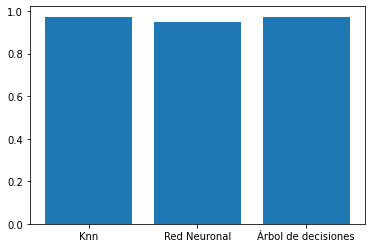

In [72]:
import matplotlib.pyplot as plt
puntajes = [knn.score(dataTest,targetTest), tree.score(dataTest,targetTest), redNeural.score(dataTest,targetTest)]
nombres = ['Knn','Red Neuronal','Árbol de decisiones']
plt.bar(nombres,puntajes)
plt.show()
